# House Prices: Advanced Regression Techniques

Notes:
- Handle outliers?

In [673]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv('data/train.csv')
train = train.set_index('Id')
test = pd.read_csv('data/test.csv')

features = train.iloc[:, 0:79]
target = train.SalePrice

## Data Visualization: 
### What does the data look like?

In [114]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

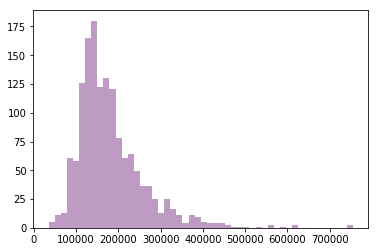

In [115]:
plt.hist(target, bins = 50, color = "#BD9BC2")

(array([  2.,   2.,   1.,   0.,   0.,   0.,   2.,   3.,   4.,   3.,   5.,
          1.,   5.,  21.,  22.,  23.,  18.,  29.,  58.,  56.,  65., 100.,
        122.,  93.,  90.,  82., 108.,  91.,  64.,  55.,  58.,  51.,  46.,
         42.,  23.,  29.,  22.,  13.,  13.,  13.,   7.,   5.,   4.,   1.,
          2.,   2.,   2.,   0.,   0.,   2.]),
 array([10.46024211, 10.52172673, 10.58321134, 10.64469596, 10.70618058,
        10.7676652 , 10.82914982, 10.89063444, 10.95211906, 11.01360367,
        11.07508829, 11.13657291, 11.19805753, 11.25954215, 11.32102677,
        11.38251138, 11.443996  , 11.50548062, 11.56696524, 11.62844986,
        11.68993448, 11.75141909, 11.81290371, 11.87438833, 11.93587295,
        11.99735757, 12.05884219, 12.12032681, 12.18181142, 12.24329604,
        12.30478066, 12.36626528, 12.4277499 , 12.48923452, 12.55071913,
        12.61220375, 12.67368837, 12.73517299, 12.79665761, 12.85814223,
        12.91962684, 12.98111146, 13.04259608, 13.1040807 , 13.16556532,
 

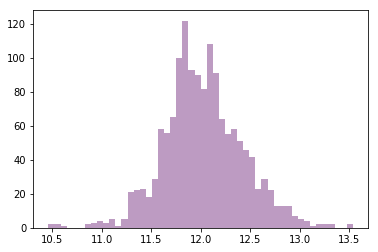

In [116]:
plt.hist(np.log(target), bins = 50, color = "#BD9BC2")

In [ ]:
# right skew to the target variable, but taking the log corrects corrects much of the issue

### Explore the relationship between sale price and other variables:

The top 10 correlated features:

In [118]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Inspecting the relationships further:

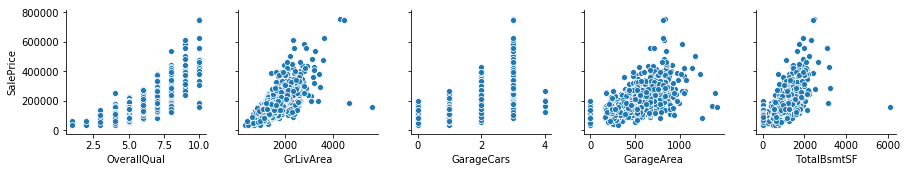

In [119]:
sns.pairplot(numeric_features[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']], 
            y_vars=['SalePrice'],
            x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'])

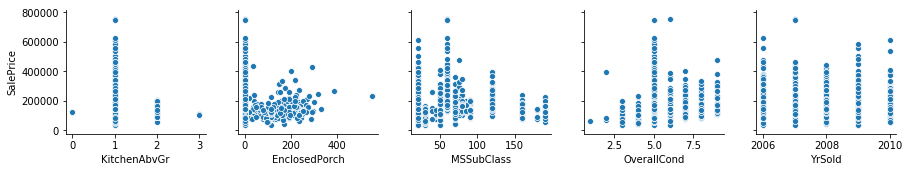

In [120]:
sns.pairplot(numeric_features[['SalePrice', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold']],
            y_vars= ['SalePrice'], 
            x_vars = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold'])

In [121]:
categoricals = features.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Processing Data
Handle missingness and dummify categorical variables

*When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.*

### Missingness

In [122]:
missingCols = features.isnull().any(axis=0)
nulls = pd.DataFrame(features[features.columns[missingCols]].isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageType,81
GarageFinish,81


Continuous Variables:
Can impute mean or 0. Using mean for now, and 0 for the variable where 0 makes sense (No Masonry Veneer area = sqft is 0). 

In [123]:
numeric_features.columns[numeric_features.isnull().any(axis=0)]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [124]:
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())
features['GarageYrBlt'] = features['GarageYrBlt'].fillna(features['GarageYrBlt'].mean())
features['MasVnrArea'] = features['MasVnrArea'].fillna(0)

Categorical Variables:
Data description confirms that NAs here means the feature doesn't exist at the house. Since these are categorical, making the lack of feature a category is natural. One row seems to be missing completely at random from the 'Electrical' column, so I am dropping that row.

In [125]:
features['PoolQC'] = features['PoolQC'].fillna('No Pool')
features['MiscFeature'] = features['MiscFeature'].fillna('None')
features['Alley'] = features['Alley'].fillna('No alley access')
features['Fence'] = features['Fence'].fillna('No Fence')
features['FireplaceQu'] = features['FireplaceQu'].fillna('No Fireplace')
features['GarageCond'] = features['GarageCond'].fillna('No Garage')
features['GarageQual'] = features['GarageQual'].fillna('No Garage')
features['GarageFinish'] = features['GarageFinish'].fillna('No Garage')
features['GarageType'] = features['GarageType'].fillna('No Garage')
features['BsmtFinType2'] = features['BsmtFinType2'].fillna('No Basement')
features['BsmtExposure'] = features['BsmtExposure'].fillna('No Basement')
features['BsmtFinType1'] = features['BsmtFinType1'].fillna('No Basement')
features['BsmtCond'] = features['BsmtCond'].fillna('No Basement')
features['BsmtQual'] = features['BsmtQual'].fillna('No Basement')
features['MasVnrType'] = features['MasVnrType'].fillna('None')

In [126]:
#drop missing electrical row
missingRows = features.isnull().any(axis=1)
features = features[-missingRows]
target = target[-missingRows]

### Dummify Categorical Variables
For linear regression only

In [127]:
# Features for MLR use only:
encoded_features = features.copy()
# Binary Categorical Variables can be changed to 0 or 1:
encoded_features['Street'] = encoded_features['Street'].apply(lambda x: 0 if x == 'Pave' else 1)
encoded_features['Utilities'] = encoded_features['Utilities'].apply(lambda x: 0 if x == 'AllPub' else 1)
encoded_features['CentralAir'] = encoded_features['CentralAir'].apply(lambda x: 0 if x == 'N' else 1)

In [128]:
categoricals = encoded_features.select_dtypes(exclude=[np.number])
cat_columns = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
cat_columns

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

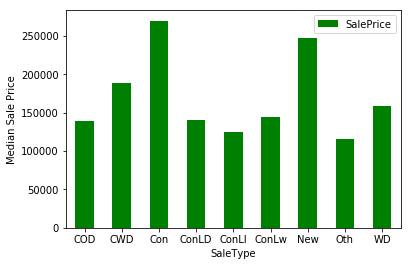

In [129]:
pivot = train.pivot_table(index='SaleType', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='green')
plt.xlabel('SaleType')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [130]:
for variable in cat_columns:
    dummy = pd.get_dummies(encoded_features[variable], prefix=variable)
    dummy.drop('_'.join([variable, encoded_features[variable][1]]), axis=1, inplace=True) # 
    encoded_features = encoded_features.drop(variable, axis=1)  # drop the original feature
    encoded_features = pd.concat([encoded_features, dummy], axis=1) # concat original df and dummy horizontally
print(encoded_features.shape)

(1459, 259)


In [131]:
print(encoded_features.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=259)


### Performing the same for the Test Data:

Reduce test features:

In [1]:
test = pd.read_csv('data/test.csv')
final_test = test[reduced_variable_names].copy()

NameError: name 'pd' is not defined

In [630]:
missingCols = final_test.isnull().any(axis=0)
nulls = pd.DataFrame(final_test[final_test.columns[missingCols]].isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,


In [623]:
numeric_test = final_test.select_dtypes(include=[np.number])
numeric_test.columns[numeric_test.isnull().any(axis=0)]

Index(['BsmtFinSF1', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'GarageArea'], dtype='object')

In [626]:
final_test['GarageCond'] = final_test['GarageCond'].fillna('No Garage')
final_test['GarageQual'] = final_test['GarageQual'].fillna('No Garage')
final_test['GarageArea'] = final_test['GarageArea'].fillna(0)
final_test['GarageCars'] = final_test['GarageCars'].fillna(0)
final_test['GarageYrBlt'] = final_test['GarageYrBlt'].fillna(features['GarageYrBlt'].mean())
final_test['BsmtCond'] = final_test['BsmtCond'].fillna('No Basement')
final_test['BsmtQual'] = final_test['BsmtQual'].fillna('No Basement')
final_test['TotalBsmtSF'] = final_test['TotalBsmtSF'].fillna(final_test['TotalBsmtSF'].mean())
final_test['BsmtFinSF1'] = final_test['BsmtFinSF1'].fillna(final_test['BsmtFinSF1'].mean())
final_test['MSZoning'] = final_test['MSZoning'].fillna(final_test['MSZoning'].mode()[0])
final_test['KitchenQual'] = final_test['KitchenQual'].fillna(final_test['KitchenQual'].mode()[0])
final_test['SaleType'] = final_test['SaleType'].fillna(final_test['SaleType'].mode()[0])

In [628]:
final_test['CentralAir'] = final_test['CentralAir'].apply(lambda x: 0 if x == 'N' else 1)
final_test['MSSubClass'] = final_test['MSSubClass'].astype(str)

In [629]:
for variable in reduced_categoricals:
    dummy = pd.get_dummies(final_test[variable], prefix=variable)
    dummy.drop('_'.join([variable, final_test[variable][1]]), axis=1, inplace=True) # 
    final_test = final_test.drop(variable, axis=1)  # drop the original feature
    final_test = pd.concat([final_test, dummy], axis=1) # concat original df and dummy horizontally
print(final_test.shape)

(1459, 124)


In [646]:
# 124 columns instead of 134. Need to make these match:
missing_cols = set( reduced_features.columns ) - set(final_test.columns )
for c in missing_cols:
    final_test[c] = 0
final_test = final_test[reduced_features.columns]
print(final_test.shape)
print(reduced_features.shape)

(1459, 134)
(1459, 134)


### Reducing Variables:

In [464]:
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [463]:
categoricals.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [486]:
reduced_numericals = ['LotArea', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 
                      'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 
                      'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd', 
                      'Fireplaces', 'CentralAir']
reduced_categoricals = ['MSSubClass', 'MSZoning', 'Condition1', 'Condition2', 'Neighborhood', 
                        'ExterQual', 'ExterCond', 'SaleType', 'SaleCondition',  'GarageQual', 
                        'GarageCond', 'HouseStyle', 'RoofMatl', 'BsmtQual',
                       'BsmtCond', 'Heating', 'KitchenQual']
reduced_variable_names = (reduced_numericals+reduced_categoricals)
reduced_features = features[reduced_variable_names].copy()
reduced_features.shape

(1459, 34)

In [488]:
reduced_features['CentralAir'] = reduced_features['CentralAir'].apply(lambda x: 0 if x == 'N' else 1)
reduced_features['MSSubClass'] = reduced_features['MSSubClass'].astype(str)

In [506]:
for variable in reduced_categoricals:
    dummy = pd.get_dummies(reduced_features[variable], prefix=variable)
    dummy.drop('_'.join([variable, reduced_features[variable][1]]), axis=1, inplace=True) # 
    reduced_features = reduced_features.drop(variable, axis=1)  # drop the original feature
    reduced_features = pd.concat([reduced_features, dummy], axis=1) # concat original df and dummy horizontally
print(reduced_features.shape)

(1459, 134)


# Linear Regression

In [704]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = np.log(target)
X = encoded_features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=.20)
mlr = linear_model.LinearRegression()
saturated_model = mlr.fit(X_train, y_train)

In [705]:
print ("R^2 for the training data : ", saturated_model.score(X_train, y_train))
print ("R^2 for the test data : ", saturated_model.score(X_test, y_test))

R^2 for the training data :  0.9456908104538988
R^2 for the test data :  0.8872248952327703


In [706]:
from sklearn.metrics import mean_squared_error
predictions = saturated_model.predict(X_test)
print ('RMSE :', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE : 0.1332132881060071


In [707]:
import statsmodels.api as sm
X_Constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_Constant)
results = model.fit()
print(results.summary()) 

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     66.49
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:39:25   Log-Likelihood:                 1112.8
No. Observations:                1167   AIC:                            -1740.
Df Residuals:                     924   BIC:                            -509.6
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Reduced Features:

In [708]:
reduced_train, reduced_test, y_train, y_test = train_test_split(reduced_features, y, random_state=78, test_size=.20)
mlr = linear_model.LinearRegression()
reduced_model = mlr.fit(reduced_train, y_train)

In [709]:
print ("R^2 for the training data : ", reduced_model.score(reduced_train, y_train))
print ("R^2 for the test data : ", reduced_model.score(reduced_test, y_test))
predictions = saturated_model.predict(X_test)
print ('RMSE :', np.sqrt(mean_squared_error(y_test, predictions)))

R^2 for the training data :  0.9282159282766137
R^2 for the test data :  0.9110772716618829
RMSE : 0.1332132881060071


In [710]:
X_Constant = sm.add_constant(reduced_train)
model = sm.OLS(y_train, X_Constant)
results = model.fit()
print(results.summary()) 

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     104.9
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:39:48   Log-Likelihood:                 950.07
No. Observations:                1167   AIC:                            -1642.
Df Residuals:                    1038   BIC:                            -989.1
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.97

### Check assumptions of Linear Regression:

Linearity:

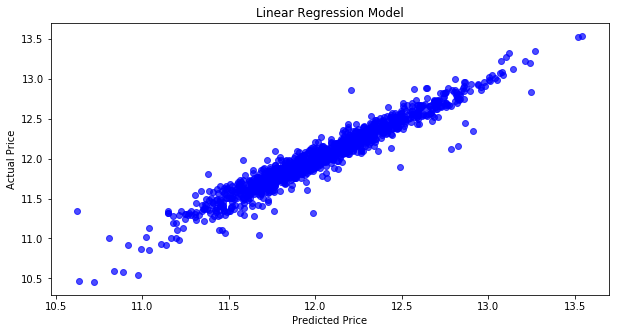

In [711]:
plt.scatter(saturated_model.predict(X), y, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

Normally distributed errors:

(array([  4.,   1.,   1.,   0.,   0.,   5.,   2.,   6.,   6.,  12.,  32.,
         64., 172., 276., 383., 270., 129.,  52.,  28.,   9.,   1.,   2.,
          1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([-0.6700806 , -0.62341129, -0.57674198, -0.53007268, -0.48340337,
        -0.43673406, -0.39006476, -0.34339545, -0.29672614, -0.25005684,
        -0.20338753, -0.15671822, -0.11004892, -0.06337961, -0.0167103 ,
         0.029959  ,  0.07662831,  0.12329762,  0.16996692,  0.21663623,
         0.26330554,  0.30997484,  0.35664415,  0.40331346,  0.44998276,
         0.49665207,  0.54332138,  0.58999068,  0.63665999,  0.6833293 ,
         0.7299986 ]),
 <a list of 30 Patch objects>)

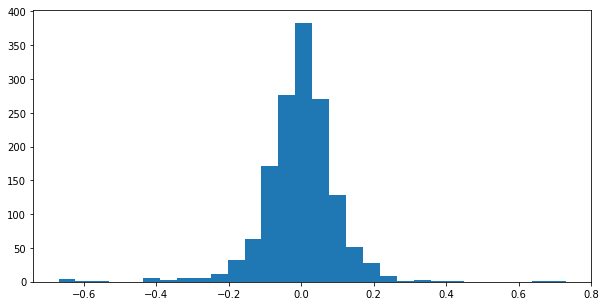

In [712]:
residuals = y - saturated_model.predict(X)
plt.hist(residuals, bins = 30)

Constant variance and independent Errors:

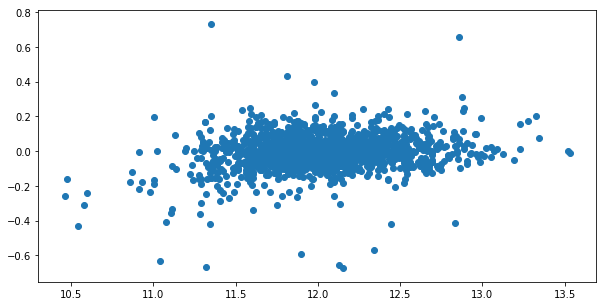

In [713]:
plt.scatter(y, residuals)

Multicollinearity:

Using all variables requires using many related variables, such as the numerous variables relating to the basement or the garage. These variables add different but related information. Lasso Regression will be used to address multicollinearity issues, decrease variance, and increase accuracy. It will have the additional benefit of feature selection.

### Ridge Regression

In [723]:
from sklearn.linear_model import Lasso, Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=.20)
ridge = Ridge()
ridge.set_params(alpha = 0,normalize =True)
ridge.fit(X, y)
ridge.score(X, y)

0.9440278046171661

In [724]:
coefs = []
intercepts = []
R2_train  = []
R2_test  = []
alphaRange = np.linspace(1e-3,15,20)
for alpha in alphaRange:
        ridge.set_params(alpha=alpha, normalize=True)  
        ridge.fit(X_train, y_train)
        intercepts.append(ridge.intercept_)
        coefs.append(ridge.coef_)
        R2_train.append(ridge.score(X_train, y_train))
        R2_test.append(ridge.score(X_test, y_test))

Text(0.5, 1.0, 'Change of Ridge Slopes Varying Alpha')

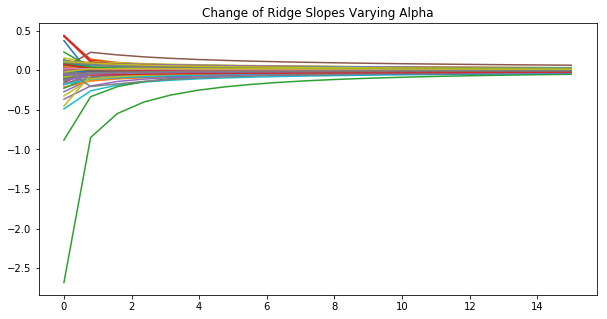

In [725]:
coefs = pd.DataFrame(np.array(coefs), columns=X.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)  
plt.title('Change of Ridge Slopes Varying Alpha')

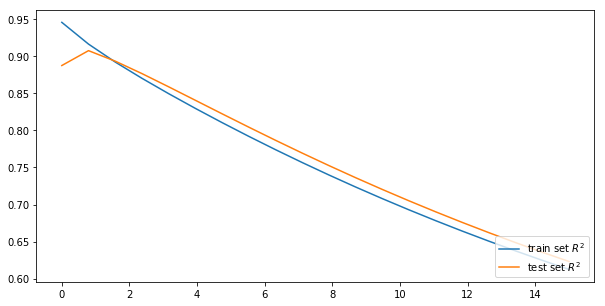

In [726]:
plt.plot(alphaRange, R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [727]:
ridge.set_params(alpha=1.6, normalize=True)
best_alpha = ridge.fit(X_train, y_train)
print(best_alpha.score(X_train, y_train))
print(best_alpha.score(X_test, y_test))

0.8916017405271287
0.892979168009788


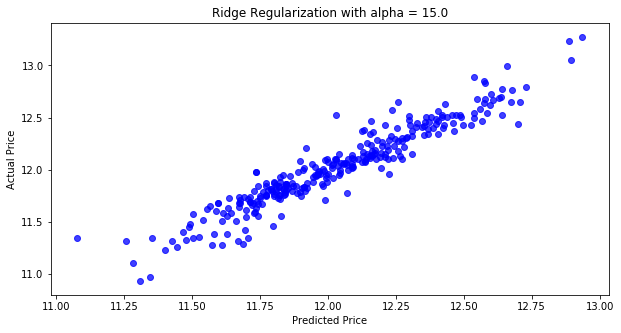

In [728]:
predictions = best_alpha.predict(X_test)
plt.scatter(predictions, y_test, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regularization with alpha = {}'.format(alpha))
plt.show()

In [720]:
print ('RMSE :', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE : 0.1297702346630355


### Reduced Features

In [729]:
reduced_train, reduced_test, y_train, y_test = train_test_split(reduced_features, y, random_state=78, test_size=.20)
ridge.set_params(alpha = 0,normalize =True)
ridge.fit(reduced_features, y)
ridge.score(reduced_features, y)

0.9285834371301815

In [730]:
coefs = []
intercepts = []
R2_train  = []
R2_test  = []
alphaRange = np.linspace(1e-3,15,20)
for alpha in alphaRange:
        ridge.set_params(alpha=alpha, normalize=True)  
        ridge.fit(reduced_train, y_train)
        intercepts.append(ridge.intercept_)
        coefs.append(ridge.coef_)
        R2_train.append(ridge.score(reduced_train, y_train))
        R2_test.append(ridge.score(reduced_test, y_test))

Text(0.5, 1.0, 'Change of Ridge Slopes Varying Alpha')

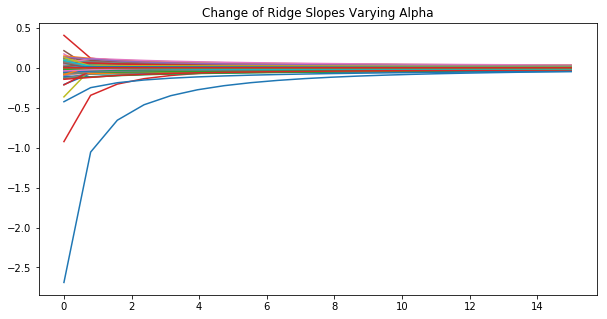

In [731]:
coefs = pd.DataFrame(np.array(coefs), columns=reduced_features.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)  
plt.title('Change of Ridge Slopes Varying Alpha')

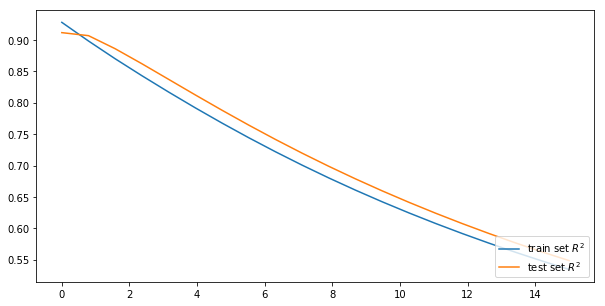

In [732]:
plt.plot(alphaRange, R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [733]:
ridge.set_params(alpha=0.9, normalize=True)
best_alpha = ridge.fit(reduced_train, y_train)
print(best_alpha.score(reduced_train, y_train))
print(best_alpha.score(reduced_test, y_test))

0.8943991990988808
0.904443411869051


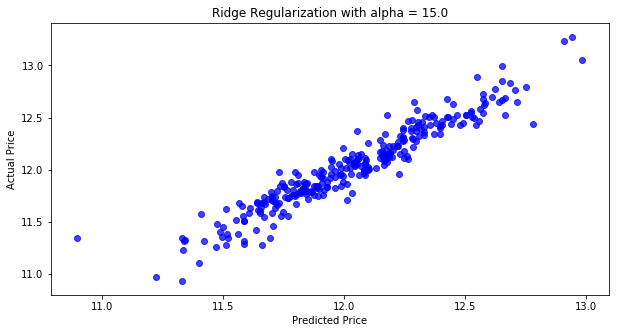

In [734]:
predictions = best_alpha.predict(reduced_test)
plt.scatter(predictions, y_test, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regularization with alpha = {}'.format(alpha))
plt.show()

In [735]:
print ('RMSE :', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE : 0.12262280485975725


# Tree-Based Models

In [427]:
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
tree_model = tree.DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(encoded_features,target,test_size=0.2)

In [428]:

scoring = make_scorer(mean_squared_error)
grid_para_tree = [{
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring=scoring, n_jobs=-1)
%time grid_search_tree.fit(X_train, y_train)

Wall time: 3.77 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=108, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=0)

In [429]:
grid_search_tree.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [430]:
grid_search_tree.best_score_

0.04651418705956034

In [431]:
grid_search_tree.score(X_train, y_train)

8.273871112957144e-10

In [432]:
grid_search_tree.score(X_test, y_test)

0.050686883842376546

### Random Forest

In [435]:
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
randomForest.fit(X_train, y_train) 

print("The training error is: %.5f" % (1-randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1-randomForest.score(X_test, y_test)))

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The training error is: 0.02850
The test     error is: 0.16857


In [449]:
grid_para_forest = {
    'max_depth': range(1, 31),
    'n_estimators': range(10, 200, 10),
}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring=scoring, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

Wall time: 15min 7s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 31), 'n_estimators': range(10, 200, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=0)

In [450]:
grid_search_forest.best_params_

{'max_depth': 1, 'n_estimators': 60}

In [451]:
grid_search_forest.best_score_

0.08787348785863298

In [459]:
print("The training error is: %.5f" % (grid_search_forest.score(X_train, y_train)))
print("The test     error is: %.5f" % (grid_search_forest.score(X_test, y_test)))

The training error is: 0.08740
The test     error is: 0.07989


In [453]:
randomForest.set_params(max_depth=1, n_estimators=60)
grid_para_forest = {
    'min_samples_leaf': range(1, 10),
    'min_samples_split': np.linspace(start=2, stop=30, num=15, dtype=int)
}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring=scoring, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

Wall time: 15.6 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=0)

In [457]:
grid_search_forest.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 18}

In [458]:
grid_search_forest.best_score_

0.08791011616671895

### Reduced Features:

In [740]:
reduced_train, reduced_test, y_train, y_test = train_test_split(reduced_features, target, random_state=78, test_size=.20)

In [679]:
reduced_train, reduced_test, y_train, y_test = train_test_split(reduced_features, target, random_state=78, test_size=.20)

randomForest = ensemble.RandomForestRegressor()
randomForest.fit(reduced_train, y_train) 

print("The training error is: %.5f" % (1-randomForest.score(reduced_train, y_train)))
print("The test     error is: %.5f" % (1-randomForest.score(reduced_test, y_test)))

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The training error is: 0.02295
The test     error is: 0.15005


In [684]:
grid_para_forest = {
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10),
}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(reduced_train, y_train)

Wall time: 4min 17s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 31), 'n_estimators': range(10, 110, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [685]:
grid_search_forest.best_params_

{'max_depth': 24, 'n_estimators': 10}

In [686]:
grid_search_forest.best_score_

0.8791005841982245

In [687]:
print("The training error is: %.5f" % (grid_search_forest.score(reduced_train, y_train)))
print("The test     error is: %.5f" % (grid_search_forest.score(reduced_test, y_test)))

The training error is: 0.97995
The test     error is: 0.84362


In [696]:
randomForest.set_params(max_depth=24, n_estimators=10)
grid_para_forest = {
    'min_samples_leaf': range(1, 10),
    'min_samples_split': np.linspace(start=2, stop=30, num=15, dtype=int)
}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(reduced_train, y_train)

Wall time: 24.7 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [697]:
grid_search_forest.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [698]:
grid_search_forest.best_score_

0.8627194771954515

In [699]:
print("The training error is: %.5f" % (grid_search_forest.score(reduced_train, y_train)))
print("The test     error is: %.5f" % (grid_search_forest.score(reduced_test, y_test)))

The training error is: 0.97533
The test     error is: 0.86088


In [743]:
target.shape

(1459,)

# Final Test Set / Submission:

In [748]:
predictions = grid_search_forest.predict(final_test)

In [701]:
target

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1459, dtype: int64

In [749]:
submission = pd.DataFrame()
submission['Id'] = test.Id
submission['SalePrice'] = predictions

In [751]:
submission.to_csv('submission1.csv', index=False)

# Gradient Boosting

In [762]:
from sklearn.ensemble import GradientBoostingRegressor
gbmr = GradientBoostingRegressor()

In [763]:
gbmr.fit(reduced_features, target)
gbmr.score(reduced_features, target)

0.9601582793807316

In [764]:
X_train, X_test, Y_train, Y_test = train_test_split(reduced_features, target, test_size=0.3)
gbmr.fit(X_train,Y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbmr.score(X_train, Y_train)))
print("The test set R^2 is %.3f" %(gbmr.score(X_test,Y_test)))

--------------------------------------------------
The train set R^2 is 0.965
The test set R^2 is 0.905


### Number of Trees

In [765]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbmr.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbmr.fit(X_train, Y_train)
gen = gbmr.staged_predict(X_train)
r2_rate1 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate1.append(r2_score(Y_train, predicted_targets))

In [766]:
gbmr.set_params(learning_rate = 0.1)
gbmr.fit(X_train, Y_train)
gen = gbmr.staged_predict(X_train)
r2_rate01 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate01.append(r2_score(Y_train, predicted_targets))   

In [767]:
gbmr.set_params(learning_rate = 0.01)
gbmr.fit(X_train, Y_train)
gen = gbmr.staged_predict(X_train)
r2_rate001 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate001.append(r2_score(Y_train, predicted_targets))    

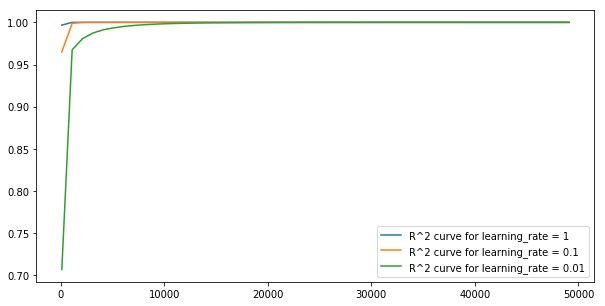

In [768]:
plt.plot(steps, r2_rate1,  label=r'R^2 curve for learning_rate = 1')
plt.plot(steps, r2_rate01, label=r'R^2 curve for learning_rate = 0.1')
plt.plot(steps, r2_rate001, label=r'R^2 curve for learning_rate = 0.01')
plt.legend(loc=4)

### Max Depth

In [770]:
gbmr.set_params(learning_rate = 0.01, max_depth = 3)
    
gbmr.fit(X_train, Y_train)
gen = gbmr.staged_predict(X_train)
r2_maxdepth3 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth3.append(r2_score(Y_train, predicted_targets)) 

In [771]:
gbmr.set_params(learning_rate = 0.01, max_depth = 5)
    
gbmr.fit(X_train, Y_train)
gen = gbmr.staged_predict(X_train)
r2_maxdepth5 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth5.append(r2_score(Y_train, predicted_targets))     

In [772]:
gbmr.set_params(learning_rate = 0.01, max_depth = 10)
    
gbmr.fit(X_train, Y_train)
gen = gbmr.staged_predict(X_train)
r2_maxdepth10 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_maxdepth10.append(r2_score(Y_train, predicted_targets))   

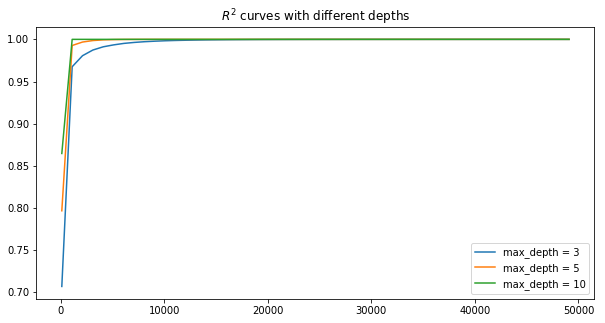

In [773]:
plt.plot(steps, r2_maxdepth3, label='max_depth = 3')
plt.plot(steps, r2_maxdepth5, label='max_depth = 5')
plt.plot(steps, r2_maxdepth10, label='max_depth = 10')
plt.title('$R^2$ curves with different depths')
plt.legend(loc=4)

### Final Model

In [774]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reduced_features, target, test_size=0.3)

In [775]:
n_estimators = 50100
gbmr.set_params(learning_rate=0.01, max_depth=3, n_estimators=n_estimators)
train_r2 = []
test_r2  = []
steps = range(100,50100,1000)

gbmr.fit(X_train, Y_train)
gen_train = gbmr.staged_predict(X_train)
gen_test  = gbmr.staged_predict(X_test)

for n in range(n_estimators):
           predicted_train = next(gen_train)
           predicted_test  = next(gen_test)
           if n not in steps: continue
           train_r2.append(r2_score(Y_train, predicted_train))
           test_r2.append(r2_score(Y_test, predicted_test))    

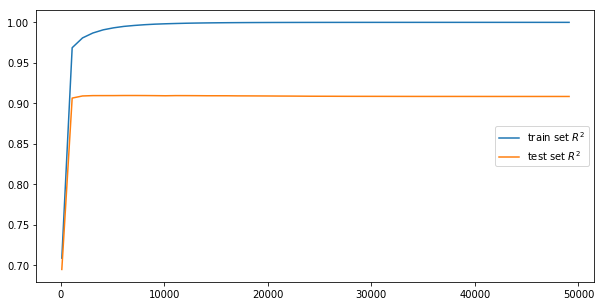

In [776]:
plt.plot(steps, train_r2, label='train set $R^2$')
plt.plot(steps, test_r2, label='test set $R^2$')
plt.legend(loc=7)

In [ ]:
make scorer:

In [2]:
from sklearn.metrics import make_scorer

def log_rmse(actual, predict):
    predict = np.array(np.log(predict))
    actual = np.array(np.log(actual))

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

log_rmse_score = make_scorer(log_rmse, greater_is_better = False)